In [34]:
import pandas as pd
import numpy as np

In [35]:
movies = pd.read_csv(r'C:\Users\Nikhil\Desktop\movies.csv')
ratings = pd.read_csv(r'C:\Users\Nikhil\Desktop\ratings.csv')
users = pd.read_csv(r'C:\Users\Nikhil\Desktop\users.csv')

In [95]:
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)')
movies['Title'] = movies['Title'].str.replace(r'(\(\d{4}\))', '', regex=True).str.strip()


movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story,"[Animation, Children's, Comedy]",NaN
1,2,Jumanji,"[Adventure, Children's, Fantasy]",NaN
2,3,Grumpier Old Men,"[Comedy, Romance]",NaN
3,4,Waiting to Exhale,"[Comedy, Drama]",NaN
4,5,Father of the Bride Part II,[Comedy],NaN


In [37]:
# Explode the 'Genres' column into separate rows for movies belonging to multiple genres
movies_genres = movies.copy()
movies_genres['Genres'] = movies_genres['Genres'].str.split('|')
movies_genres = movies_genres.explode('Genres')

In [38]:
# Merge ratings with movies_genres to get genre information for each rating
ratings_with_genres = ratings.merge(movies_genres, on='MovieID')


In [39]:
# Aggregate ratings by UserID and Genre, then unstack to get the desired user-genre matrix
user_genre_ratings = ratings_with_genres.groupby(['UserID', 'Genres']).Rating.mean().unstack(fill_value=0)
user_genre_ratings.isnull().any()

Genres
Action         False
Adventure      False
Animation      False
Children's     False
Comedy         False
Crime          False
Documentary    False
Drama          False
Fantasy        False
Film-Noir      False
Horror         False
Musical        False
Mystery        False
Romance        False
Sci-Fi         False
Thriller       False
War            False
Western        False
dtype: bool

In [40]:
user_genre_ratings
rating_matrix = user_genre_ratings.to_numpy()
user_genre_ratings

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,,,,,,,,,,,,,,,,,,
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,0.000000,4.428571,4.00,0.000000,0.000000,4.285714,0.000000,3.666667,4.333333,3.666667,5.000000,0.000000
2,3.500000,3.736842,0.000000,0.000000,3.560000,3.583333,0.000000,3.898734,3.00,4.000000,3.000000,0.000000,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,0.000000,0.000000,4.000000,4.50,0.000000,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,0.000000,4.000000,0.000000,5.000000,0.000000,4.166667,4.50,0.000000,4.333333,0.000000,0.000000,4.000000,3.555556,3.500000,3.333333,4.500000
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,0.00,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.00,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.25,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000
6038,3.000000,4.000000,3.666667,3.000000,3.833333,0.000000,0.000000,3.888889,0.00,0.000000,2.500000,0.000000,0.000000,4.166667,4.000000,0.000000,4.000000,0.000000


In [41]:

new_rm = rating_matrix[:100, :]

# Display the selected elements
print("First 100 elements of the matrix:")
print(new_rm)
# Assuming rating_matrix is your NumPy matrix
shape = new_rm.shape

# Display the shape of the matrix
print("Shape of the matrix:", shape)


First 100 elements of the matrix:
[[4.2        4.         4.11111111 ... 3.66666667 5.         0.        ]
 [3.5        3.73684211 0.         ... 3.48387097 3.73333333 4.33333333]
 [3.95652174 4.         4.         ... 3.8        4.         4.66666667]
 ...
 [4.         3.5        0.         ... 3.5        4.6        0.        ]
 [3.46666667 3.66666667 3.75       ... 3.         3.66666667 4.        ]
 [2.9516129  3.09090909 0.         ... 2.92857143 3.07142857 3.        ]]
Shape of the matrix: (100, 18)


# SVD Implementation

In [45]:
import numpy as np
from numpy.linalg import eig

class SVD:
	def __init__(self, A):
		self.u, self.s, self.vh = self.svd(A)

	def gram_schmidt(self, A):
		m, n = A.shape
		Q = np.zeros((m, n))
		R = np.zeros((n, n))

		for j in range(n):
			v = A[:, j]
			for i in range(j):
				R[i, j] = np.dot(Q[:, i], A[:, j])
				v = v - R[i, j] * Q[:, i]
			R[j, j] = np.linalg.norm(v, ord=2)
			Q[:, j] = v / R[j, j]

		return Q, R

	def eig(self, A, max_iter=1000, tol=1e-6):
		for _ in range(max_iter):
			Q, R = self.gram_schmidt(A)
			A = np.dot(R, Q)
			
			if np.linalg.norm(A - np.diag(np.diag(A)), ord=2) < tol:
				break

		return np.diag(A), Q

	def svd(self, A):
		m, n = A.shape

		if(m < n):
			A = A.T
			m, n = A.shape

		ATA = A.T.dot(A)
		eigenvals, V = eig(ATA)


		idx = eigenvals.argsort()[::-1]
		self.num_eig = idx.shape[0]
		V = V[:, idx]

		singularvals = np.sqrt(np.maximum(eigenvals[idx], 0))
		self.singularvalues = singularvals
		S = np.zeros((m, n))

		S[:min(m, n), :min(m, n)] = np.diag(singularvals)

		U = np.zeros((m, m))
		for i in range(min(m, n)):
			if singularvals[i] != 0:
				U[:, i] = A.dot(V[:, i]) / singularvals[i]

		return U, S, V.T

	def truncated_svd(self, A, k):
		U, S, Vt = self.svd(A)
		
		k = self.num_eig - k
		Uk = U[:, :k]
		Sk = S[:k, :k]
		Vtk = Vt[:k, :]

		return Uk, Sk, Vtk

	def return_matrices(self):
		return self.u, self.s, self.vh

	def return_trunc_matrices(self, A, k):
		return self.truncated_svd(A, k)


# Create an instance of CustomSVD with your matrix
svd_instance = SVD(new_rm)
U, S, VT = svd_instance.return_matrices()

U.shape

(6040, 6040)

In [46]:
S.shape

(6040, 18)

In [47]:
VT.shape

(18, 18)

In [48]:
S

array([[1081.18443029,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  174.2935706 ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  147.29048463, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [49]:
import numpy as np

# Assuming S is your matrix
diagonal_entries = np.diag(S)

# 'diagonal_entries' now contains only the diagonal elements of S
diagonal_entries

array([1081.18443029,  174.2935706 ,  147.29048463,  129.90637863,
        128.95093678,  110.53556119,  102.82749874,   94.4944624 ,
         91.69591269,   76.85658301,   72.09432799,   65.24699812,
         52.52916867,   47.09623034,   40.87976471,   33.60815724,
         30.59403351,   23.38673451])

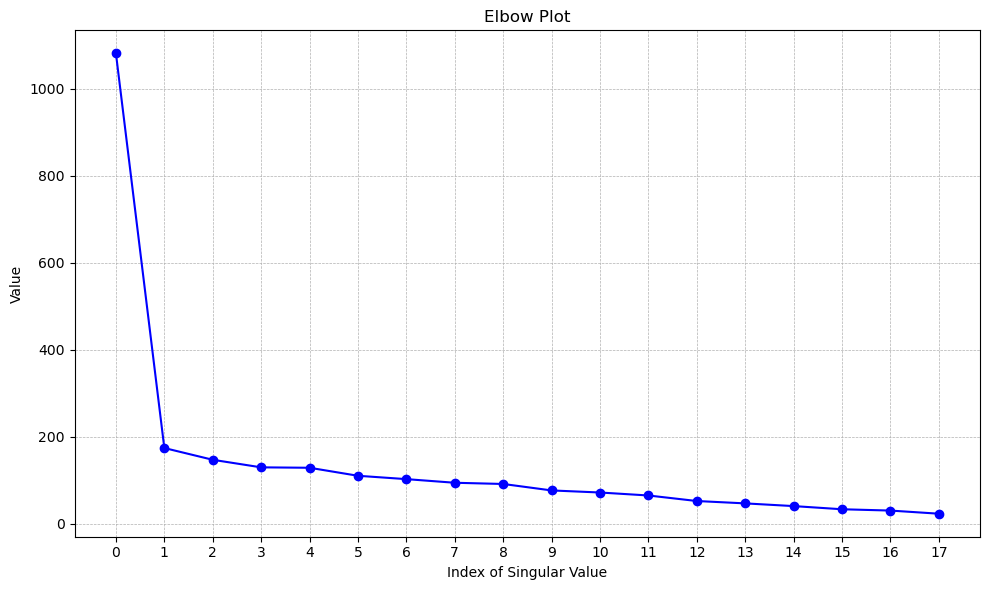

In [50]:
import matplotlib.pyplot as plt
# Plotting the values
plt.figure(figsize=(10, 6))
plt.plot(diagonal_entries, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot')
plt.xlabel('Index of Singular Value')
plt.ylabel('Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(len(diagonal_entries)))
plt.tight_layout()
plt.show()

In [54]:
U = U[:,:7]

## K-Means

In [55]:
import numpy as np

def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data points."""
    indices = np.random.permutation(data.shape[0])
    centroids = data[indices[:k]]
    return centroids

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(data, assignments, k):
    """Update centroids as the mean of all data points assigned to each cluster."""
    new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(data, k, max_iters=100, tol=1e-4):
    """Manual implementation of the k-means algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        assignments = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, assignments, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, assignments

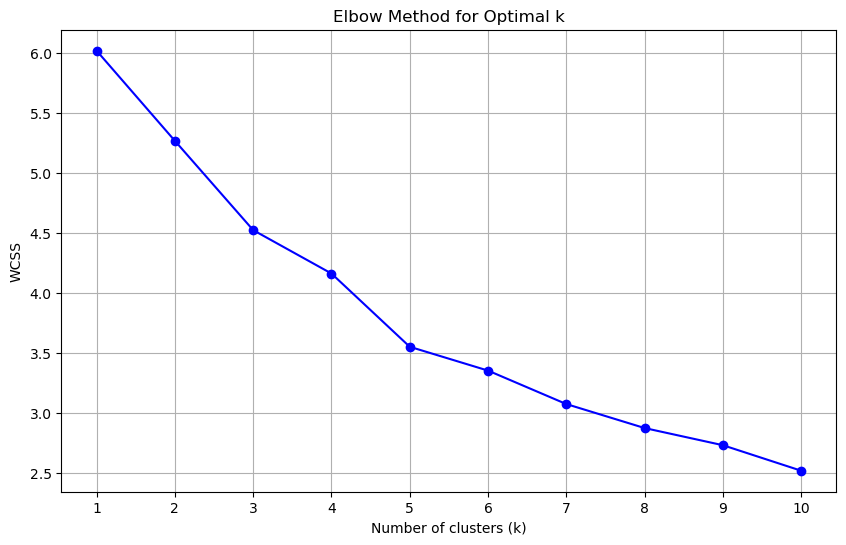

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_wcss(data, centroids, assignments):
    """Calculate the total within-cluster sum of square."""
    wcss = 0.0
    for i, centroid in enumerate(centroids):
        # Calculate the sum of squares for the points in this cluster
        cluster_points = data[assignments == i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

# Assuming 'data' is your dataset and 'k_means' is the function from the previous example

max_k = 10
wcss_list = []
data = U
for k in range(1, max_k + 1):
    centroids, assignments = k_means(data, k)
    wcss = calculate_wcss(data, centroids, assignments)
    wcss_list.append(wcss)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss_list, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()


Centroids:
 [[-1.07583328e-02 -9.62042638e-03 -8.82039614e-03  9.83270386e-03
  -3.73597220e-03  1.70329727e-02 -3.15513051e-03]
 [-1.39338509e-02  1.43600171e-02 -1.26312548e-04  5.17898023e-03
   7.04363836e-03 -1.68821556e-03 -4.99099198e-04]
 [-1.20753824e-02 -1.02416393e-02  5.80504437e-05  9.31404276e-03
  -7.57192567e-03 -1.35966106e-02  5.62432517e-03]
 [-1.35636525e-02  8.05813889e-04 -3.03338310e-04 -1.48976428e-02
  -6.52123581e-03 -4.99161469e-04 -4.04841745e-04]
 [-1.20741739e-02 -1.20189235e-02  9.74669600e-03 -8.02099154e-03
   1.48964126e-02  2.94851369e-03 -2.78384025e-03]]
Assignments: [2 3 4 ... 0 3 1]


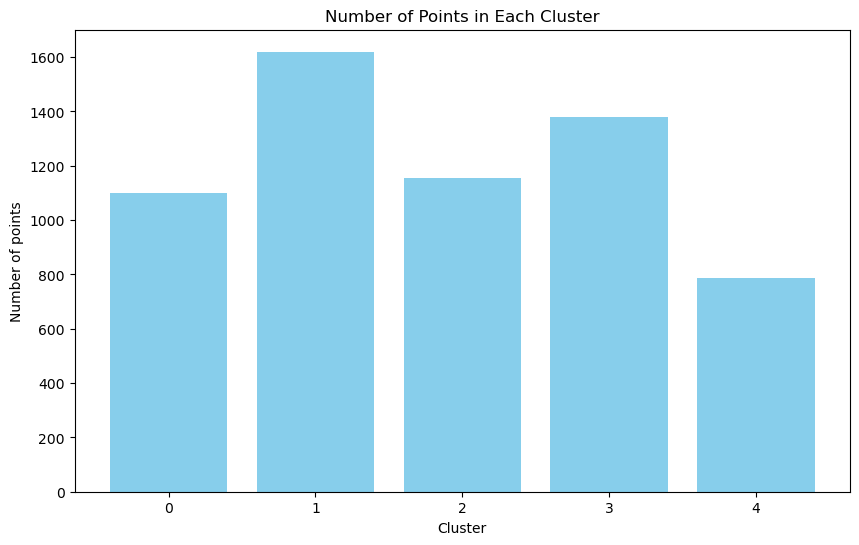

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Example usage
data = U
k = 5  # Number of clusters
centroids, assignments = k_means(data, k)

print("Centroids:\n", centroids)
print("Assignments:", assignments)

# Count the number of points in each cluster
cluster_counts = np.bincount(assignments, minlength=k)

# Generate cluster indices from 0 to k-1
clusters = np.arange(k)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(clusters, cluster_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of points')
plt.title('Number of Points in Each Cluster')
plt.xticks(clusters)
plt.show()


In [66]:
# Filter movies by genre "Comedy"
comedy_movies = movies[movies['Genres'].str.contains('Comedy')]

# Select 10 random comedy movies
comedy_movies_sample = comedy_movies.sample(n=10, random_state=42)

# Create the user_ratings dictionary
user_ratings = {}
for title in comedy_movies_sample['Title']:
    user_ratings[title] = 5

print("User ratings for 10 random comedy movies:")
print(user_ratings)


User ratings for 10 random comedy movies:
{'Catfish in Black Bean Sauce': 5, "Hard Day's Night, A": 5, "Muriel's Wedding": 5, 'Jungle2Jungle (a.k.a. Jungle 2 Jungle)': 5, 'Unstrung Heroes': 5, "Porky's Revenge": 5, 'Shall We Dance?': 5, 'Cup, The (Phörpa)': 5, 'Raising Arizona': 5, 'Muse, The': 5}


In [67]:
# Assuming you have a DataFrame 'movies' with 'Title' and 'Genres'
# First, map movie titles to MovieID
movie_ids = movies.set_index('Title')['MovieID'].to_dict()
movie_ids

{'Toy Story': 1,
 'Jumanji': 2,
 'Grumpier Old Men': 3,
 'Waiting to Exhale': 4,
 'Father of the Bride Part II': 5,
 'Heat': 6,
 'Sabrina': 915,
 'Tom and Huck': 8,
 'Sudden Death': 9,
 'GoldenEye': 10,
 'American President, The': 11,
 'Dracula: Dead and Loving It': 12,
 'Balto': 13,
 'Nixon': 14,
 'Cutthroat Island': 15,
 'Casino': 16,
 'Sense and Sensibility': 17,
 'Four Rooms': 18,
 'Ace Ventura: When Nature Calls': 19,
 'Money Train': 20,
 'Get Shorty': 21,
 'Copycat': 22,
 'Assassins': 23,
 'Powder': 24,
 'Leaving Las Vegas': 25,
 'Othello': 2848,
 'Now and Then': 27,
 'Persuasion': 28,
 'City of Lost Children, The': 29,
 'Shanghai Triad (Yao a yao yao dao waipo qiao)': 30,
 'Dangerous Minds': 31,
 'Twelve Monkeys': 32,
 'Wings of Courage': 33,
 'Babe': 34,
 'Carrington': 35,
 'Dead Man Walking': 36,
 'Across the Sea of Time': 37,
 'It Takes Two': 38,
 'Clueless': 39,
 'Cry, the Beloved Country': 40,
 'Richard III': 41,
 'Dead Presidents': 42,
 'Restoration': 43,
 'Mortal Kombat':

In [68]:
# Convert user ratings from title to MovieID
user_ratings_by_id = {movie_ids[title]: rating for title, rating in user_ratings.items() if title in movie_ids}
user_ratings_by_id

{3883: 5,
 2863: 5,
 342: 5,
 1474: 5,
 205: 5,
 3690: 5,
 1066: 5,
 3241: 5,
 1394: 5,
 2829: 5}

In [69]:
# Convert this dict to a DataFrame
new_user_ratings_df = pd.DataFrame(list(user_ratings_by_id.items()), columns=['MovieID', 'Rating'])
new_user_ratings_df

,MovieID,Rating
0,3883,5
1,2863,5
2,342,5
3,1474,5
4,205,5
5,3690,5
6,1066,5
7,3241,5
8,1394,5
9,2829,5


In [70]:
import pandas as pd

# Let's assume you have a DataFrame `movies` already loaded with 'MovieID', 'Title', and 'Genres'
# Ensure the 'Genres' column is a list of genres
movies['Genres'] = movies['Genres'].str.split('|')

# Explode the 'Genres' column into separate rows
movies_genres_exploded = movies.explode('Genres')

# Create a DataFrame where each MovieID has a separate column for each genre
# Use get_dummies to convert genres to a one-hot encoded format
movieID_genre_df = pd.get_dummies(movies_genres_exploded, columns=['Genres'], prefix='', prefix_sep='')

# Since exploding creates duplicate indices, we need to group by 'MovieID' and sum the genre columns
movieID_genre_df = movieID_genre_df.groupby('MovieID').sum().reset_index()

# Now, 'movieID_genre_df' is a DataFrame where each row represents a MovieID and each column represents a genre
# The cells contain a 1 if the movie belongs to the genre, and 0 otherwise
movieID_genre_df

,MovieID,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy StoryToy StoryToy Story,199519951995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,JumanjiJumanjiJumanji,199519951995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old MenGrumpier Old Men,19951995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to ExhaleWaiting to Exhale,19951995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,2000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# Merge new user's ratings with the movieID_genre_df to get genre information for each rating
new_user_with_genres = new_user_ratings_df.merge(movieID_genre_df, on='MovieID')
new_user_with_genres

,MovieID,Rating,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3883,5,Catfish in Black Bean SauceCatfish in Black Be...,20002000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2863,5,"Hard Day's Night, AHard Day's Night, A",19641964,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,342,5,Muriel's WeddingMuriel's Wedding,19941994,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1474,5,Jungle2Jungle (a.k.a. Jungle 2 Jungle)Jungle2J...,19971997,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,205,5,Unstrung HeroesUnstrung Heroes,19951995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,3690,5,Porky's Revenge,1985,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1066,5,Shall We Dance?Shall We Dance?Shall We Dance?,193719371937,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7,3241,5,"Cup, The (Phörpa)",1999,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1394,5,Raising Arizona,1987,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,2829,5,"Muse, TheMuse, The",19991999,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Assume new_user_with_genres is a DataFrame that results from merging the new user's ratings
# with the movieID_genre_df DataFrame and that it contains a 'Rating' column with numerical ratings
# and one-hot encoded genre columns.

# Filter out non-numeric columns (which should leave us with just the genres)
numeric_columns = new_user_with_genres.select_dtypes(include=[np.number]).columns

# Calculate the weighted genre scores by multiplying the rating by the genre indicators
new_user_genre_scores = new_user_with_genres[numeric_columns].multiply(new_user_with_genres['Rating'], axis='index')

# Since we want to ignore the 'MovieID' column in the mean calculation, we drop it
new_user_genre_scores = new_user_genre_scores.drop(columns=['MovieID'])

# Sum these weighted scores to get a total score for each genre
new_user_genre_totals = new_user_genre_scores.sum().to_frame().T

# If you want the average score instead of the total, divide by the number of movies rated
new_user_genre_averages = new_user_genre_totals.div(len(new_user_ratings_df))

# The full user-genre matrix's genres from your SVD and clustering will have specific genre columns,
# ensure the new user's genre ratings align with these columns
aligned_new_user_genre_ratings = new_user_genre_averages.reindex(columns=user_genre_ratings.columns, fill_value=0)

aligned_new_user_genre_ratings


Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.5,5.0,0.0,0.0,1.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
# Assuming svd_VT is the right singular vectors obtained from your SVD, and 
# aligned_new_user_genre_ratings is the new user's genre ratings
user_latent_features = aligned_new_user_genre_ratings.dot(VT.T)
user_latent_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-2.307732,-1.01433,0.232134,0.686303,0.0605,0.813559,0.604847,-0.618377,-0.094003,0.100709,0.291877,-1.10235,-2.199094,0.039754,-0.061446,3.094678,1.147484,-2.037737


In [74]:
print("Centroids shape:", centroids.shape)
# Assuming 'aligned_new_user_genre_ratings' is correctly set up
# and 'svd_VT' is your right singular vectors with the appropriate dimensionality
num_components = centroids.shape[1]  # This should match the dimensionality of your centroids
user_latent_features = aligned_new_user_genre_ratings.dot(VT[:num_components].T)


Centroids shape: (5, 7)


In [77]:
from sklearn.metrics.pairwise import euclidean_distances

# Recalculate distances with corrected dimensions
distances = euclidean_distances(user_latent_features, centroids)

# Find the index of the closest cluster
closest_cluster_index = np.argmin(distances)
closest_cluster_index

0

In [78]:
# Suppose 'cluster_assignments' is a numpy array containing the cluster assignments for each user
# 'closest_cluster_index' is the index of the closest cluster

# Find users belonging to the closest cluster
closest_cluster_users = np.where(assignments == closest_cluster_index)[0]
closest_cluster_users

array([   6,   11,   13, ..., 6019, 6026, 6037], dtype=int64)

In [79]:
ratings_in_cluster = ratings[ratings['UserID'].isin(closest_cluster_users)]
ratings_in_cluster

,UserID,MovieID,Rating,Timestamp
452,6,2406,5,978236670
453,6,1101,4,978236670
454,6,3717,4,978238371
455,6,1030,4,978237691
456,6,1688,5,978237570
...,...,...,...,...
999720,6037,1080,4,956719097
999721,6037,1086,4,956718757
999722,6037,1089,3,956718797
999723,6037,562,4,956709118


In [80]:
movies_in_cluster = ratings_in_cluster[['MovieID', 'Rating']]
movies_in_cluster

,MovieID,Rating
452,2406,5
453,1101,4
454,3717,4
455,1030,4
456,1688,5
...,...,...
999720,1080,4
999721,1086,4
999722,1089,3
999723,562,4


In [81]:
new_user_rated_movies = set(user_ratings.keys())

In [82]:
unrated_movies = movies_in_cluster[~movies_in_cluster['MovieID'].isin(new_user_rated_movies)]
unrated_movies

,MovieID,Rating
452,2406,5
453,1101,4
454,3717,4
455,1030,4
456,1688,5
...,...,...
999720,1080,4
999721,1086,4
999722,1089,3
999723,562,4


In [83]:
# Calculate average rating for each movie
movie_avg_ratings = unrated_movies.groupby('MovieID')['Rating'].mean().reset_index()

# Sort movies by average rating
top_rated_movies = movie_avg_ratings.sort_values(by='Rating', ascending=False)

# Select the top 5 movies to recommend
top_5_recommended_movies = top_rated_movies.head(5)
top_5_recommended_movies


,MovieID,Rating
1220,1420,5.0
881,1026,5.0
3023,3495,5.0
1588,1899,5.0
1893,2219,5.0


In [103]:
def convert_movie_id_to_title(movie_id, movies):

    movie = movies[movies['MovieID'] == movie_id]
    if not movie.empty:
        return movie['Title'].values[0]
    else:
        return "Unknown Title"  # Return a default value if MovieID is not found

# Convert MovieIDs to titles if necessary and present them
recommended_movie_titles = [convert_movie_id_to_title(movie_id, movies) for movie_id in top_5_recommended_movies['MovieID']]

# Display or return the recommended movie titles
print("Recommended movies:", recommended_movie_titles)


Recommended movies: ['Message to Love: The Isle of Wight Festival', 'So Dear to My Heart', 'Roadside Prophets', 'Passion in the Desert', 'Murder!']


In [108]:
# Assuming movies is your dataframe and movies_to_check is your list of movie titles.

def get_movie_genres(movie_title, movies_df):
    movie_row = movies_df[movies_df['Title'] == movie_title]
    if not movie_row.empty:
        # Directly return the 'Genres' list without splitting.
        genres = movie_row['Genres'].values[0]
        return genres
    else:
        return []  # If the movie title is not found, return an empty list.

# Replace 'movies_to_check' with your actual list of movie titles to check.
movies_to_check = recommended_movie_titles

# Get the genres for each movie in the list.
genres_per_movie = [get_movie_genres(movie_title, movies) for movie_title in movies_to_check]

# Print the genres for each movie.
for i, movie_title in enumerate(movies_to_check):
    print(f"{movie_title}: {genres_per_movie[i]}")


Message to Love: The Isle of Wight Festival: ['Documentary']
So Dear to My Heart: ["Children's", 'Drama']
Roadside Prophets: ['Comedy', 'Drama']
Passion in the Desert: ['Adventure', 'Drama']
Murder!: ['Mystery', 'Thriller']


In [107]:
from collections import Counter

# Assuming genres_per_movie is a list of lists with genres for each movie
# For example: genres_per_movie = [['Comedy'], ['Drama', 'Comedy'], ['Thriller']]

# Flatten the list of lists into a single list of genres
all_genres = [genre for movie_genres in genres_per_movie for genre in movie_genres]

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Find the most common genre
most_common_genre = genre_counts.most_common(1)[0][0]

print("Most frequently occurring genre among recommended movies:", most_common_genre)


Most frequently occurring genre among recommended movies: Drama
